# Data Science Project - Analyzing the Homicide Reports Dataset

I'm loading in the Supplementary Homicide Report (SHR) dataset, obtained through The Murder Accountability Project, that has assembled case details on 732,171 homicides from 1976 through 2015, including 23,435 cases not reported to the FBI.  
I conducted exploratory data analysis (EDA) - cleaning and preparing the data for analysis. Then I explored trends in the data (solved vs. unsolved cases), realtionship between variables, and added visual representation of the data throughout the analysis.  


In [1]:
# Necessary imports for EDA
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
from __future__ import division

In [2]:
# Display plots in Jupyter Notebook
%matplotlib inline

# Increase maximum rows and columns to 999 (instead of the default 60)
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

In [3]:
# Load in the Supplementary Homicide Report (SHR)
shr = pd.read_csv('/Users/adibronshtein/Documents/Datasets/Capstone/SHR1976_2015.csv', low_memory=False)

In [6]:
# Check the first five rows, to see that data loaded correctly:
shr.head()

,ID,CNTYFIPS,Ori,State,Agency,Agentype,Source,Solved,Year,StateName,Month,Incident,ActionType,Homicide,Situation,VicAge,VicSex,VicRace,VicEthnic,OffAge,OffSex,OffRace,OffEthnic,Weapon,Relationship,Circumstance,Subcircum,VicCount,OffCount,FileDate,fstate,MSA,StateName2
0,197601001AKASP00,"Juneau, AK",AKASP00,Alaska,State Troopers,Primary state LE,FBI,Yes,1976,ALASKA,January,1,Normal update,Murder and non-negligent manslaughter,Single victim/single offender,48,Male,American Indian or Alaskan Native,Unknown or not reported,55,Female,American Indian or Alaskan Native,Unknown or not reported,Knife or cutting instrument,Husband,Other arguments,NaN,0,0,30180,Alaska,Rural Alaska,ALASKA
1,197601001AL00102,"Jefferson, AL",AL00102,Alabama,Birmingham,Municipal police,FBI,Yes,1976,ALA,January,1,Normal update,Murder and non-negligent manslaughter,Single victim/single offender,65,Male,Black,Unknown or not reported,67,Male,Black,Unknown or not reported,Shotgun,Acquaintance,Felon killed by private citizen,Felon killed in commission of a crime,0,0,30180,Alabama,"Birmingham-Hoover, AL",ALA
2,197601001AL00104,"Jefferson, AL",AL00104,Alabama,Fairfield,Municipal police,FBI,Yes,1976,ALA,January,1,Normal update,Murder and non-negligent manslaughter,Single victim/single offender,45,Female,Black,Unknown or not reported,53,Male,Black,Unknown or not reported,Shotgun,Wife,Other,NaN,0,0,30180,Alabama,"Birmingham-Hoover, AL",ALA
3,197601001AL00106,"Jefferson, AL",AL00106,Alabama,Leeds,Municipal police,FBI,Yes,1976,ALA,January,1,Normal update,Murder and non-negligent manslaughter,Single victim/single offender,43,Male,Black,Unknown or not reported,35,Female,Black,Unknown or not reported,Knife or cutting instrument,Brother,Other arguments,NaN,0,0,30180,Alabama,"Birmingham-Hoover, AL",ALA
4,197601001AL00201,"Mobile, AL",AL00201,Alabama,Mobile,Municipal police,FBI,Yes,1976,ALA,January,1,Adjustment,Murder and non-negligent manslaughter,Single victim/single offender,35,Male,White,Unknown or not reported,25,Female,White,Unknown or not reported,Strangulation - hanging,Acquaintance,Circumstances undetermined,NaN,0,0,30180,Alabama,"Mobile, AL",ALA


In [44]:
# Check the last five rows
shr.tail()

,ID,CNTYFIPS,Ori,State,Agency,Agentype,Source,Solved,Year,StateName,Month,Incident,ActionType,Homicide,Situation,VicAge,VicSex,VicRace,VicEthnic,OffAge,OffSex,OffRace,OffEthnic,Weapon,Relationship,Circumstance,Subcircum,VicCount,OffCount,FileDate,fstate,MSA,StateName2
732166,201512961FL03703,"Leon, FL",FL03703,Florida,Tallahassee,Municipal police,MAP,Yes,2015,FLA,December,961,Normal update,Murder and non-negligent manslaughter,Single victim/single offender,24.0,Male,Black,Unknown or not reported,32.0,Male,Black,Unknown or not reported,Rifle,Relationship not determined,Felon killed by police,Felon killed in commission of a crime,0,0,30116,Florida,"Tallahassee, FL",FLA
732167,201512985FL04100,"Manatee, FL",FL04100,Florida,Manatee County,Sheriff,MAP,Yes,2015,FLA,December,985,Normal update,Murder and non-negligent manslaughter,Single victim/single offender,1.0,Male,Black,Unknown or not reported,37.0,Male,White,Unknown or not reported,"Personal weapons, includes beating",Relationship not determined,All other manslaughter by negligence,NaN,0,0,30116,Florida,"Sarasota-Bradenton-Venice, FL",FLA
732168,201512986FL04100,"Manatee, FL",FL04100,Florida,Manatee County,Sheriff,MAP,Yes,2015,FLA,December,986,Normal update,Murder and non-negligent manslaughter,Single victim/single offender,26.0,Male,Black,Unknown or not reported,37.0,Male,Black,Unknown or not reported,"Firearm, type not stated",Relationship not determined,Other,NaN,0,0,30116,Florida,"Sarasota-Bradenton-Venice, FL",FLA
732169,201512987FL04100,"Manatee, FL",FL04100,Florida,Manatee County,Sheriff,MAP,Yes,2015,FLA,December,987,Normal update,Murder and non-negligent manslaughter,Single victim/single offender,27.0,Male,Black,Unknown or not reported,20.0,Male,Black,Unknown or not reported,"Firearm, type not stated",Relationship not determined,Other - not specified,NaN,0,0,30116,Florida,"Sarasota-Bradenton-Venice, FL",FLA
732170,201512987LA02803,"Lafayette, LA",LA02803,Louisiana,Lafayette,Municipal police,FBI,No,2015,LA,December,987,2,Murder and non-negligent manslaughter,Single victim/unknown offender(s),57.0,Male,Asian or Pacific Islander,Unknown or not reported,NaN,Unknown,Unknown,Unknown or not reported,"Handgun - pistol, revolver, etc",Relationship not determined,Robbery,NaN,0,0,60216,Louisiana,"Lafayette, LA",LA


## Exploratory Data Analysis

In [8]:
shr.shape

(732171, 33)

As described on The Murder Accountability Project website (http://www.murderdata.org/), it has assembled case details on 732,171 homicides from 1976 through 2015, including 23,435 cases not reported to the FBI. As seen here, there are $732,171$ rows in this dataset, and 33 columns.

In [9]:
shr.columns

Index([u'ID', u'CNTYFIPS', u'Ori', u'State', u'Agency', u'Agentype', u'Source',
       u'Solved', u'Year', u'StateName', u'Month', u'Incident', u'ActionType',
       u'Homicide', u'Situation', u'VicAge', u'VicSex', u'VicRace',
       u'VicEthnic', u'OffAge', u'OffSex', u'OffRace', u'OffEthnic', u'Weapon',
       u'Relationship', u'Circumstance', u'Subcircum', u'VicCount',
       u'OffCount', u'FileDate', u'fstate', u'MSA', u'StateName2'],
      dtype='object')

### Data Dictionary 

| Column | Description | 
| :--- | :--- | 
| ID | ID of incident |
| CNTYFIPS | County |
| Ori | Originating Agency Identifier |
| State | State|
| Agency | Law Enforcement Agency|
| Agentype | Type of Agency |
| Source| FBI or Murder Accountability Project |
| Solved | Case Solved or Not |
| Year | Year of Incident |
| StateName| Name of State |
| Month | Month of Incident |
| Incident | (defined as) Incident Number |
| ActionType | What Actions Were Taken Post-Incident |
| Homicide | Type/Degree of Homicide |
| Situation | Single vs. Multiple Victims/Offenders |
| VicAge | Age of Victim |
| VicSex | Gender of Victim |
| VicRace | Race of Victim | 
| VicEthnic | Ethnicity of Offender |
| OffAge | Age of Victim |
| OffSex | Gender of Offender |
| OffRace | Race of Offender | 
| OffEthnic | Ethnicity of Offender |
| Weapon | Weapon Used in Incident |
| Relationship | Relationship between Victim(s) and Offender(s) |
| Circumstance | Circumstances of Incident |
| Subcircum | Subcirumstances of Incident | 
| VicCount | Number of Victims |
| OffCount | Number of Offenders |
| FileDate | Date the Incident Was Filed |
| fstate | State Names (again) | 
| MSA | Metropolitan Statistical Area | 
| StateName2 | State Name, Mostly Shortened |

In [10]:
shr.dtypes

ID              object
CNTYFIPS        object
Ori             object
State           object
Agency          object
Agentype        object
Source          object
Solved          object
Year             int64
StateName       object
Month           object
Incident         int64
ActionType      object
Homicide        object
Situation       object
VicAge          object
VicSex          object
VicRace         object
VicEthnic       object
OffAge          object
OffSex          object
OffRace         object
OffEthnic       object
Weapon          object
Relationship    object
Circumstance    object
Subcircum       object
VicCount         int64
OffCount         int64
FileDate         int64
fstate          object
MSA             object
StateName2      object
dtype: object

Some columns (such as VicAge and OffAge) will have to be converted to numerical in order to analyze them. 

In [11]:
shr.VicAge.value_counts()

22                      26330
25                      26147
21                      25976
20                      25892
23                      25663
24                      24989
19                      24725
26                      23588
27                      22350
30                      21609
28                      21080
29                      20704
18                      20676
32                      18026
31                      17926
33                      16386
35                      16334
34                      16295
17                      15757
36                      14247
37                      13424
38                      13007
40                      12774
39                      12345
42                      11008
41                      10841
16                      10613
0                       10529
999                     10290
43                       9891
45                       9470
44                       9114
46                       8446
47        

In [12]:
# 999/'999' stand for missing values. I'm changing those to NaN
shr.VicAge.replace('999',np.nan, inplace=True)
shr.VicAge.replace(999, np.nan, inplace=True)
shr.VicAge.replace('99 years old or more', 99, inplace=True)

In [13]:
shr.VicAge = shr.VicAge.astype(float)

In [14]:
shr.OffAge.unique()

array(['55', '67', '53', '35', '25', '26', '29', '19', '30', '42', '43',
       '27', '45', '56', '18', '33', '57', '14', '16', '78', '23', '999',
       '70', '17', '37', '15', '39', '10', '40', '41', '20', '51', '24',
       '32', '44', '36', '58', '28', '52', '31', '21', '61', '22', '34',
       '38', '64', '48', '84', '65', '76', '46', '71', '49', '62', '79',
       '68', '66', '50', '81', '47', '63', '59', '13', '74', '11', '77',
       '73', '88', '12', '54', '60', '75', '83', '3', '86', '69',
       '99 years old or more', '72', '85', '9', '94', '8', '80', '98', '7',
       '82', '5', '87', '6', '2', '4', '90', '89', '92', '91', '93',
       '1 year old', '95', '96', '97'], dtype=object)

999 stands for missing values. Not surprisingly, there are a lot of missing values for offender's age - most likely unknown offenders. 


In [15]:
shr.OffAge.value_counts()

999                     242269
20                       24466
19                       22862
21                       21788
22                       21406
18                       21143
25                       20560
23                       20352
24                       19200
26                       17250
27                       16472
17                       16060
30                       15918
28                       15736
29                       14666
31                       12724
32                       12626
33                       11482
35                       11261
34                       10824
16                       10767
36                        9566
37                        9152
38                        8569
40                        8104
39                        8033
41                        7014
42                        6794
43                        6289
15                        6202
45                        5862
44                        5850
46      

In [16]:
# Replace 999/'999' with np.nap
shr.OffAge.replace([999,'999'], np.nan, inplace=True)

In [17]:
shr.OffAge.replace('99 years old or more', 100, inplace=True)

In [18]:
# Don't know a lot of 1 year old murderers... Probably a data entry error. Only 36 in the entire dataset though. 
shr.OffAge.replace('1 year old', 1, inplace=True)

In [19]:
# Convert offenders age to numerical:
shr['OffAge'] = pd.to_numeric(shr['OffAge'], errors = 'coerce')

In [20]:
# Descriptive statistics of numerical columns
shr.describe()

,Year,Incident,VicAge,OffAge,VicCount,OffCount,FileDate
count,732171.000000,732171.000000,721881.000000,489902.000000,732171.000000,732171.000000,732171.000000
mean,1994.282741,26.301014,32.762727,30.902246,0.123737,0.179402,50973.232108
std,11.265598,102.364930,16.171170,12.876774,0.542241,0.583334,32154.539944
min,1976.000000,0.000000,0.000000,1.000000,0.000000,0.000000,10181.000000
25%,1985.000000,1.000000,22.000000,21.000000,0.000000,0.000000,30112.000000
50%,1993.000000,2.000000,29.000000,28.000000,0.000000,0.000000,33084.000000
75%,2004.000000,10.000000,41.000000,37.000000,0.000000,0.000000,80790.000000
max,2015.000000,999.000000,99.000000,100.000000,10.000000,34.000000,123197.000000


In [21]:
# Median age of victims and offenders:
print shr['VicAge'].median()
print shr['OffAge'].median()

29.0
28.0


In [23]:
# Missing values
shr.isnull().sum()

ID                   0
CNTYFIPS             0
Ori                  0
State                0
Agency               0
Agentype             0
Source               0
Solved               0
Year                 0
StateName            0
Month                0
Incident             0
ActionType           0
Homicide             0
Situation            0
VicAge           10290
VicSex               0
VicRace              0
VicEthnic       284629
OffAge          242269
OffSex               0
OffRace              0
OffEthnic       285122
Weapon               0
Relationship         0
Circumstance         0
Subcircum       704798
VicCount             0
OffCount             0
FileDate             0
fstate               0
MSA                  0
StateName2           0
dtype: int64

Missing information about offenders is understandable, a little weird that there is missing information about victims - I assume it cases where they could not get a positive ID of the victim. Subcirumstances is missing a lot because it contains very specific circumstances (felon kills felon, felon killed by police etc). Other than that - not a lot of missing data!

In [24]:
# Check for duplicates
shr.duplicated().sum()

1939

In [25]:
# Apparently, some cases were reported more than once. I will drop them:
shr.drop_duplicates(inplace=True)

In [26]:
# And recheck for duplicates:
shr.duplicated().sum()

0

In [27]:
shr.Year.unique()

array([1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986,
       1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997,
       1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012, 2013, 2014, 2015])

As mentioned, the dataset spans from 1976 to 2015.

### General Info on Solved vs. Unsolved Cases


In [28]:
print shr.Solved.value_counts()
print shr.Solved.value_counts(normalize=True)

Yes    516988
No     213244
Name: Solved, dtype: int64
Yes    0.707978
No     0.292022
Name: Solved, dtype: float64


$29\%$ of homicides reported between 1976 and 2015 were not solved (solved is defined as arrest made in the case).

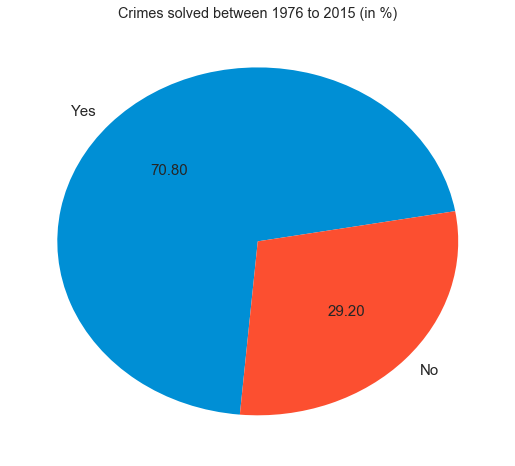

In [29]:
## Rate of crimes solved
solved = pd.DataFrame(shr, columns = ['Solved']) 
resolution = solved.stack().value_counts()
ax = resolution.plot(kind = 'pie', figsize=(8,8), fontsize=15,
                              title = 'Crimes solved between 1976 to 2015 (in %)',
                              startangle = 10,
                              autopct='%.2f')
ax.set_ylabel('')

## Dates Information

### Murder Rates and Solved Cases by Year:

In [30]:
# Number of homicides each year
shr.Year.value_counts()

1993    24274
1992    23735
1994    23183
1980    23033
1991    22617
1979    21620
1990    21203
1981    21163
1995    21112
1982    20490
1986    20088
1989    19823
1983    19617
1978    19478
1996    18949
1977    18775
1987    18748
1988    18747
1985    18351
1984    18062
1997    17766
1976    17584
2007    17268
2006    17234
2005    16803
2003    16466
2002    16234
2004    16199
1998    16045
2009    15811
2001    15776
2015    15585
2008    15564
2010    15089
2012    15006
2011    14733
2000    14661
1999    14593
2013    14436
2014    14311
Name: Year, dtype: int64

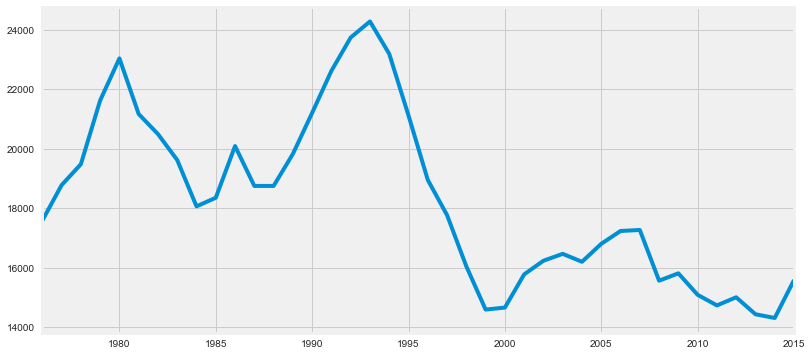

In [32]:
plt.figure(figsize=(12,6))
yearMRD = shr['Year'].value_counts()
yearMRD.sort_index().plot(kind='line')

In [31]:
# "Deadliest" years
shr.Year.value_counts()[0:10]

1993    24274
1992    23735
1994    23183
1980    23033
1991    22617
1979    21620
1990    21203
1981    21163
1995    21112
1982    20490
Name: Year, dtype: int64

In [33]:
# Solved cases by year
shr.groupby('Year').Solved.value_counts()

Year  Solved
1976  Yes       13891
      No         3693
1977  Yes       14195
      No         4580
1978  Yes       14963
      No         4515
1979  Yes       15987
      No         5633
1980  Yes       16696
      No         6337
1981  Yes       15763
      No         5400
1982  Yes       15025
      No         5465
1983  Yes       14492
      No         5125
1984  Yes       13223
      No         4839
1985  Yes       13605
      No         4746
1986  Yes       14798
      No         5290
1987  Yes       13447
      No         5301
1988  Yes       13371
      No         5376
1989  Yes       14145
      No         5678
1990  Yes       14967
      No         6236
1991  Yes       15292
      No         7325
1992  Yes       15851
      No         7884
1993  Yes       16400
      No         7874
1994  Yes       15836
      No         7347
1995  Yes       14324
      No         6788
1996  Yes       13089
      No         5860
1997  Yes       12125
      No         5641
1998  Yes       112

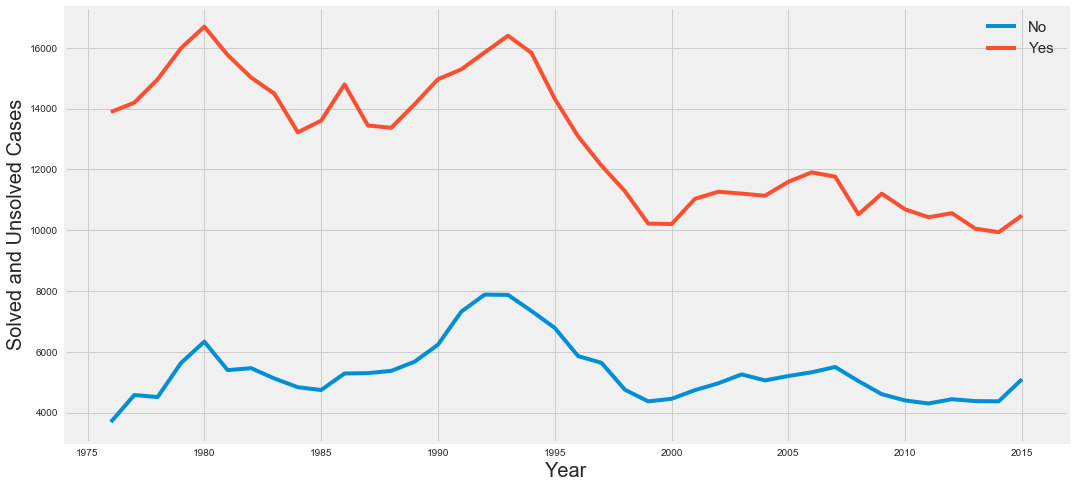

In [35]:
# Number of cases by year and solved/unsolved
plt.figure(figsize=(16,8))
solved_year_crosstab = pd.crosstab(shr.Year, shr.Solved)
for item in solved_year_crosstab.columns:
    plt.plot(solved_year_crosstab.index, solved_year_crosstab[item])
    
plt.xlabel('Year', fontsize=20)
plt.ylabel('Solved and Unsolved Cases', fontsize=20)
plt.legend(fontsize=15)

In [36]:
# Percentage of solved cases by year
shr.groupby('Year').Solved.value_counts(normalize=True)

Year  Solved
1976  Yes       0.789980
      No        0.210020
1977  Yes       0.756059
      No        0.243941
1978  Yes       0.768200
      No        0.231800
1979  Yes       0.739454
      No        0.260546
1980  Yes       0.724873
      No        0.275127
1981  Yes       0.744838
      No        0.255162
1982  Yes       0.733285
      No        0.266715
1983  Yes       0.738747
      No        0.261253
1984  Yes       0.732089
      No        0.267911
1985  Yes       0.741376
      No        0.258624
1986  Yes       0.736659
      No        0.263341
1987  Yes       0.717250
      No        0.282750
1988  Yes       0.713234
      No        0.286766
1989  Yes       0.713565
      No        0.286435
1990  Yes       0.705891
      No        0.294109
1991  Yes       0.676129
      No        0.323871
1992  Yes       0.667832
      No        0.332168
1993  Yes       0.675620
      No        0.324380
1994  Yes       0.683087
      No        0.316913
1995  Yes       0.678477
      No    

### Murder Rates by Months:


In [37]:
shr.Month.value_counts()

July         66806
August       66063
December     63494
September    61985
October      61333
May          61072
June         61070
January      60337
March        58960
April        58346
November     57648
February     53118
Name: Month, dtype: int64

Probably not surprisingly, the hottest months of the year are the "deadliest". What is surprising is December is right after - maybe the stress of the holiday season affects people??? 

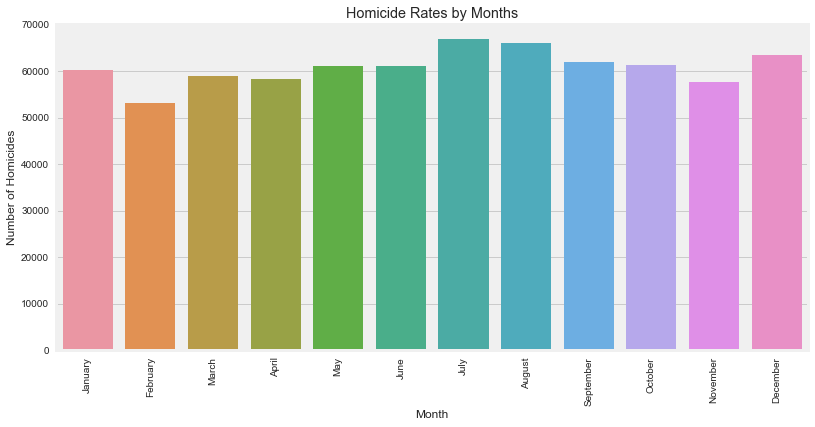

In [38]:
plt.figure(figsize=(12,6))
sns.countplot(x='Month', data=shr, order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.xticks(rotation=90)
plt.title('Homicide Rates by Months')
plt.xlabel('Month')
plt.ylabel('Number of Homicides')
plt.show()

In [42]:
# Solved cases by month
print shr.groupby('Month').Solved.value_counts()


Month      Solved
April      Yes       42027
           No        16319
August     Yes       46817
           No        19246
December   Yes       43208
           No        20286
February   Yes       38623
           No        14495
January    Yes       43662
           No        16675
July       Yes       47597
           No        19209
June       Yes       43333
           No        17737
March      Yes       42289
           No        16671
May        Yes       43726
           No        17346
November   Yes       39383
           No        18265
October    Yes       42674
           No        18659
September  Yes       43649
           No        18336
Name: Solved, dtype: int64


In [43]:
# Percentage of solved cases by month
print shr.groupby('Month').Solved.value_counts(normalize=True)

Month      Solved
April      Yes       0.720306
           No        0.279694
August     Yes       0.708672
           No        0.291328
December   Yes       0.680505
           No        0.319495
February   Yes       0.727117
           No        0.272883
January    Yes       0.723636
           No        0.276364
July       Yes       0.712466
           No        0.287534
June       Yes       0.709563
           No        0.290437
March      Yes       0.717249
           No        0.282751
May        Yes       0.715975
           No        0.284025
November   Yes       0.683163
           No        0.316837
October    Yes       0.695776
           No        0.304224
September  Yes       0.704186
           No        0.295814
Name: Solved, dtype: float64


There isn't a big difference in solved cases rate in the differnt months of the year.

## Location Information

In [45]:
shr.State.value_counts()

California              112223
Texas                    70745
New York                 56940
Florida                  42131
Michigan                 32669
Illinois                 31646
Pennsylvania             27801
Georgia                  23885
North Carolina           23260
Ohio                     22629
Louisiana                22549
Maryland                 19128
Virginia                 17772
Missouri                 17177
Tennessee                16870
New Jersey               16174
Arizona                  14068
South Carolina           13541
Alabama                  13360
Indiana                  13058
Oklahoma                 10039
Washington                8640
Kentucky                  8172
District of Columbia      8055
Arkansas                  7842
Mississippi               7512
Colorado                  7483
Wisconsin                 7023
Massachusetts             6907
Nevada                    6117
Connecticut               5441
New Mexico                4779
Oregon  

A very important thing to remember is the population size in each state - it's really not surprising that the 3 states with the highest murder rates are also the three most populated states...

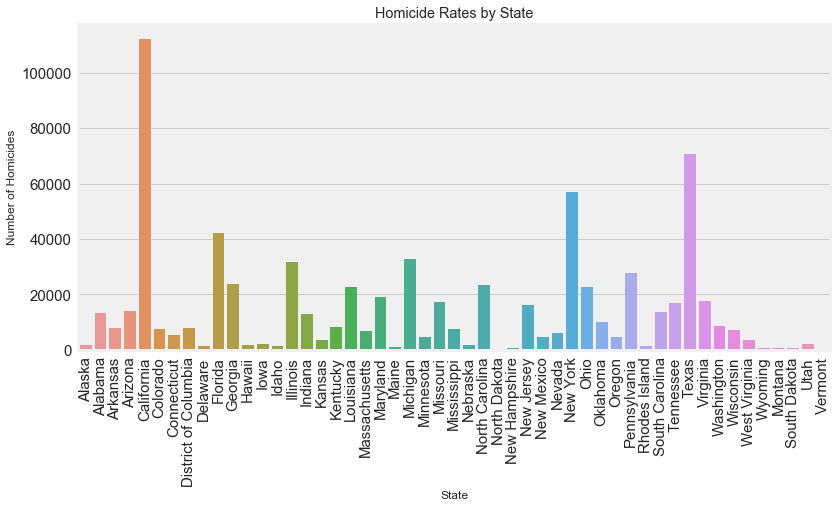

In [46]:
plt.figure(figsize=(12,6))
sns.countplot(x='State', data=shr)
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.title('Homicide Rates by State')
plt.xlabel('State')
plt.ylabel('Number of Homicides')
plt.show()

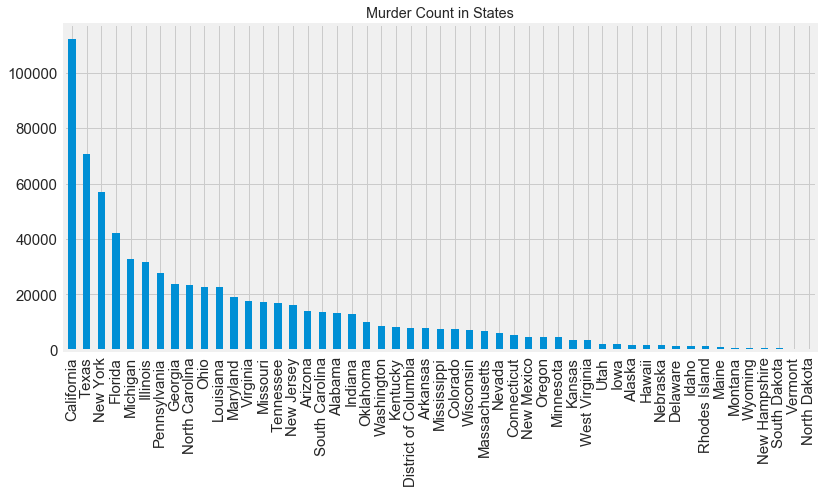

In [47]:
# And by order:
shr.State.value_counts().plot("bar",figsize=(12,6), fontsize=15,title="Murder Count in States")

In [48]:
# Solved cases by state
shr.groupby('State').Solved.value_counts()

State                 Solved
Alabama               Yes       10778
                      No         2582
Alaska                Yes        1522
                      No          351
Arizona               Yes       10136
                      No         3932
Arkansas              Yes        6670
                      No         1172
California            Yes       71826
                      No        40397
Colorado              Yes        5950
                      No         1533
Connecticut           Yes        3679
                      No         1762
Delaware              Yes        1119
                      No          269
District of Columbia  No         5043
                      Yes        3012
Florida               Yes       30312
                      No        11819
Georgia               Yes       17521
                      No         6364
Hawaii                Yes        1225
                      No          375
Idaho                 Yes        1242
                     

In [49]:
# Percentage of olved cases by state
shr.groupby('State').Solved.value_counts(normalize=True)

State                 Solved
Alabama               Yes       0.806737
                      No        0.193263
Alaska                Yes       0.812600
                      No        0.187400
Arizona               Yes       0.720500
                      No        0.279500
Arkansas              Yes       0.850548
                      No        0.149452
California            Yes       0.640029
                      No        0.359971
Colorado              Yes       0.795136
                      No        0.204864
Connecticut           Yes       0.676162
                      No        0.323838
Delaware              Yes       0.806196
                      No        0.193804
District of Columbia  No        0.626071
                      Yes       0.373929
Florida               Yes       0.719470
                      No        0.280530
Georgia               Yes       0.733557
                      No        0.266443
Hawaii                Yes       0.765625
                      No    

## Information about Victims:

In [50]:
# Race of victims
shr['VicRace'].value_counts()

White                                364616
Black                                342226
Asian or Pacific Islander             10428
Unknown                                7703
American Indian or Alaskan Native      5259
Name: VicRace, dtype: int64

In [54]:
# Percentage of race of victims 
shr['VicRace'].value_counts(normalize=True)

White                                0.499315
Black                                0.468654
Asian or Pacific Islander            0.014280
Unknown                              0.010549
American Indian or Alaskan Native    0.007202
Name: VicRace, dtype: float64

White and black victims make up the vast majority of victims in the dataset. 

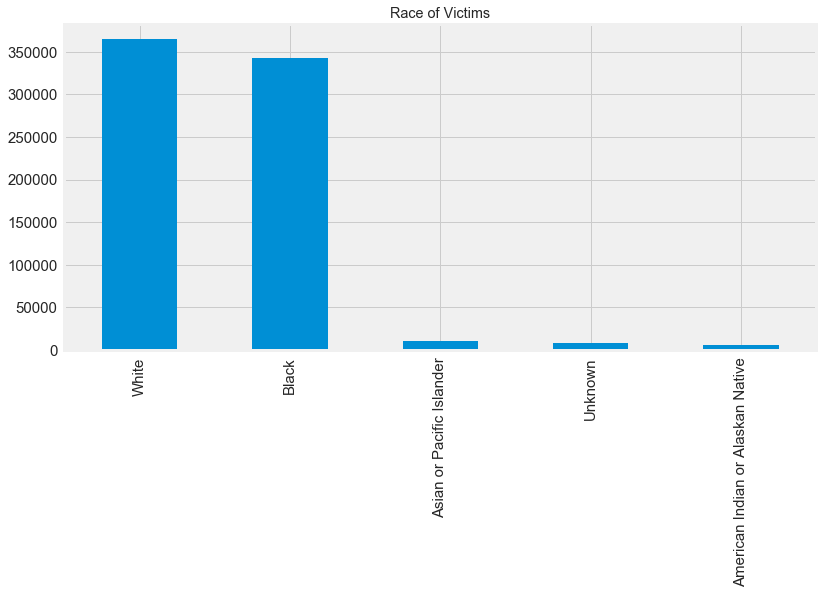

In [51]:
shr['VicRace'].value_counts().plot("bar",figsize=(12,6), fontsize=15,title="Race of Victims")

In [52]:
# Ethnicity of victims
shr['VicEthnic'].value_counts()

Not of Hispanic origin     203006
Unknown or not reported    169175
Hispanic origin             74344
Name: VicEthnic, dtype: int64

In [56]:
# Percentage of ethnicity of victims 
shr['VicEthnic'].value_counts(normalize=True)

Not of Hispanic origin     0.454635
Unknown or not reported    0.378870
Hispanic origin            0.166495
Name: VicEthnic, dtype: float64

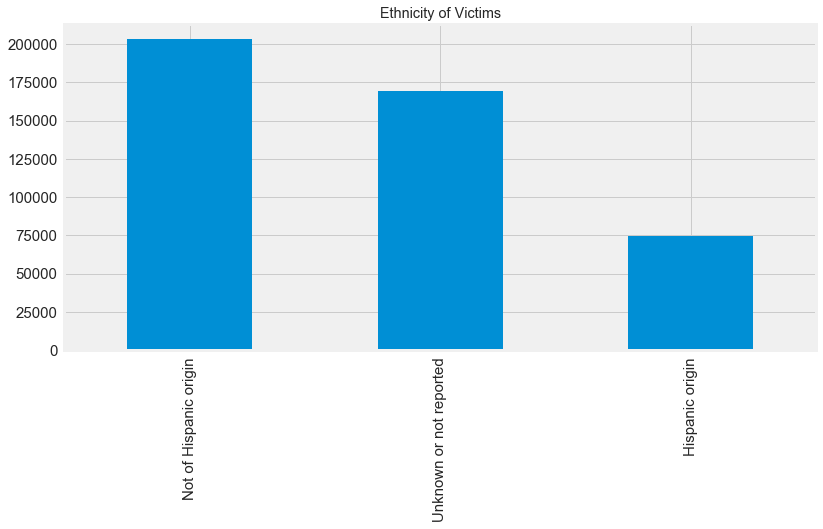

In [53]:
shr['VicEthnic'].value_counts().plot("bar",figsize=(12,6), fontsize=15,title="Ethnicity of Victims")

In [57]:
# Victims' gender
shr['VicSex'].value_counts()

Male       564727
Female     164436
Unknown      1069
Name: VicSex, dtype: int64

In [58]:
# Percentage of victims' gender
shr['VicSex'].value_counts(normalize=True)

Male       0.773353
Female     0.225183
Unknown    0.001464
Name: VicSex, dtype: float64

There are by far more male victims that female victims. My theory is that it is because the data contains gang violence statistics.

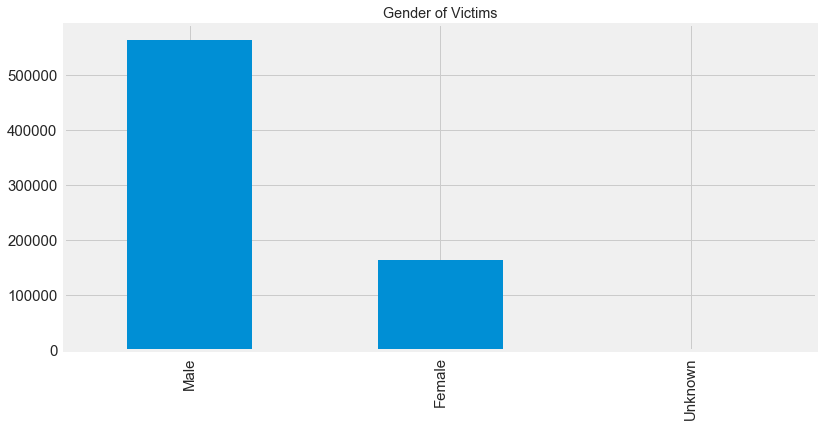

In [59]:
shr['VicSex'].value_counts().plot("bar",figsize=(12,6), fontsize=15,title="Gender of Victims")

In [61]:
# Age of victims
shr.VicAge.value_counts()

22.0    26244
25.0    26067
21.0    25893
20.0    25781
23.0    25582
24.0    24917
19.0    24612
26.0    23531
27.0    22296
30.0    21554
28.0    21026
29.0    20664
18.0    20583
32.0    18004
31.0    17887
33.0    16360
35.0    16319
34.0    16275
17.0    15672
36.0    14235
37.0    13405
38.0    12994
40.0    12758
39.0    12336
42.0    10991
41.0    10825
16.0    10567
0.0     10470
43.0     9881
45.0     9459
44.0     9109
46.0     8440
47.0     8025
50.0     7566
48.0     7390
49.0     7177
15.0     6593
52.0     6217
51.0     6179
1.0      6095
53.0     5699
54.0     5359
55.0     5152
56.0     4726
57.0     4464
2.0      4330
58.0     3954
60.0     3844
59.0     3789
14.0     3762
62.0     3478
61.0     3331
63.0     3053
65.0     2940
3.0      2714
64.0     2704
67.0     2404
66.0     2236
68.0     2174
13.0     2154
70.0     2122
69.0     2021
72.0     1905
4.0      1905
71.0     1809
73.0     1641
75.0     1629
74.0     1590
12.0     1441
76.0     1425
5.0      1387
77.0  

It seems that at the top of this chart, there are mostly victims in their 20s and 30s. 

In [5]:
shr.groupby('VicSex').Solved.value_counts(normalize=True)

VicSex   Solved
Female   Yes       0.769905
         No        0.230095
Male     Yes       0.690412
         No        0.309588
Unknown  No        0.640955
         Yes       0.359045
Name: Solved, dtype: float64

In [6]:
shr.groupby('VicRace').Solved.value_counts(normalize=True)

VicRace                            Solved
American Indian or Alaskan Native  Yes       0.797192
                                   No        0.202808
Asian or Pacific Islander          Yes       0.705742
                                   No        0.294258
Black                              Yes       0.674408
                                   No        0.325592
Unknown                            Yes       0.551005
                                   No        0.448995
White                              Yes       0.741249
                                   No        0.258751
Name: Solved, dtype: float64

In [7]:
shr.groupby('VicEthnic').Solved.value_counts(normalize=True)

VicEthnic                Solved
Hispanic origin          Yes       0.653799
                         No        0.346201
Not of Hispanic origin   Yes       0.735170
                         No        0.264830
Unknown or not reported  Yes       0.726326
                         No        0.273674
Name: Solved, dtype: float64

In [12]:
# Interaction between gender and race
shr.groupby(['VicSex','VicRace']).Solved.value_counts(normalize=True)

VicSex   VicRace                            Solved
Female   American Indian or Alaskan Native  Yes       0.802557
                                            No        0.197443
         Asian or Pacific Islander          Yes       0.795281
                                            No        0.204719
         Black                              Yes       0.736493
                                            No        0.263507
         Unknown                            Yes       0.611940
                                            No        0.388060
         White                              Yes       0.791655
                                            No        0.208345
Male     American Indian or Alaskan Native  Yes       0.795443
                                            No        0.204557
         Asian or Pacific Islander          Yes       0.667576
                                            No        0.332424
         Black                              Yes       0.661207
    

### Offenders:

In [63]:
# Gender of offenders:
shr['OffSex'].value_counts()

Male       458229
Unknown    213298
Female      58705
Name: OffSex, dtype: int64

In [64]:
shr['OffSex'].value_counts(normalize=True)

Male       0.627512
Unknown    0.292096
Female     0.080392
Name: OffSex, dtype: float64

Vast majority of offenders are males. 

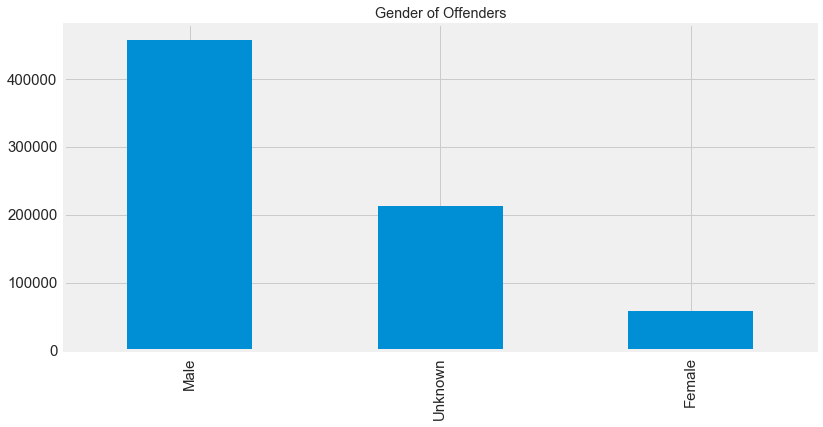

In [65]:
shr['OffSex'].value_counts().plot("bar",figsize=(12,6), fontsize=15,title="Gender of Offenders")

In [66]:
# Race of offenders
shr['OffRace'].value_counts()

White                                251322
Black                                248471
Unknown                              219907
Asian or Pacific Islander              6367
American Indian or Alaskan Native      4165
Name: OffRace, dtype: int64

In [67]:
shr['OffRace'].value_counts(normalize=True)

White                                0.344167
Black                                0.340263
Unknown                              0.301147
Asian or Pacific Islander            0.008719
American Indian or Alaskan Native    0.005704
Name: OffRace, dtype: float64

There is a pretty even distribution of white and black offenders. Relatively few Asian, Pacific Islanders, American Indians or Alaskan Natives.

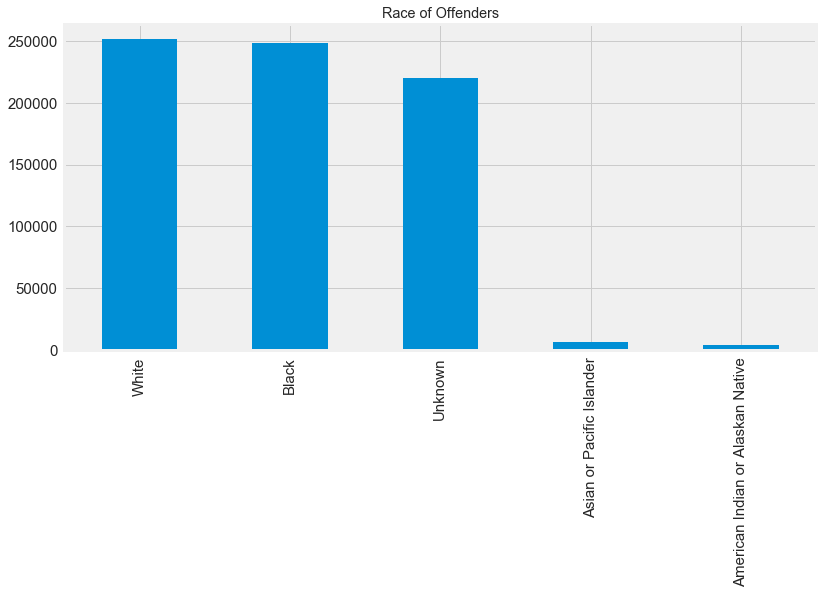

In [69]:
shr['OffRace'].value_counts().plot(kind='bar' ,figsize=(12,6), fontsize=15,title="Race of Offenders")

In [70]:
# Ethnicity of offenders
shr['OffEthnic'].value_counts()

Unknown or not reported    249484
Not of Hispanic origin     148687
Hispanic origin             47862
Name: OffEthnic, dtype: int64

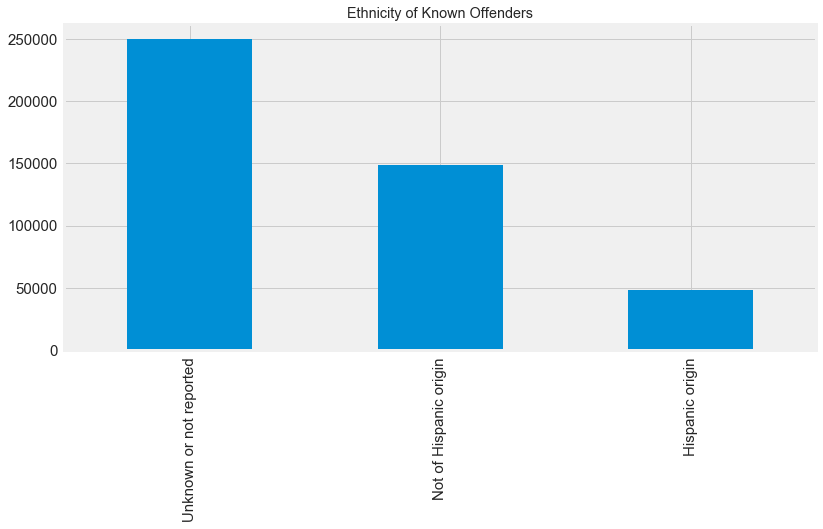

In [71]:
shr['OffEthnic'].value_counts().plot(kind='bar' ,figsize=(12,6), fontsize=15,title="Ethnicity of Known Offenders")

In [72]:
# Ages of offenders
shr['OffAge'].value_counts()

20.0     24370
19.0     22793
21.0     21721
22.0     21344
18.0     21084
25.0     20498
23.0     20296
24.0     19153
26.0     17224
27.0     16440
17.0     16023
30.0     15877
28.0     15695
29.0     14635
31.0     12683
32.0     12599
33.0     11457
35.0     11236
34.0     10797
16.0     10745
36.0      9547
37.0      9130
38.0      8557
40.0      8089
39.0      8017
41.0      7003
42.0      6787
43.0      6272
15.0      6190
45.0      5847
44.0      5840
46.0      4831
47.0      4769
48.0      4499
49.0      4191
50.0      4177
51.0      3605
52.0      3353
53.0      3043
14.0      2985
54.0      2787
55.0      2661
56.0      2430
57.0      2139
58.0      2027
59.0      1891
60.0      1713
61.0      1483
62.0      1408
13.0      1295
63.0      1276
64.0      1263
65.0      1145
66.0       968
67.0       936
68.0       874
69.0       758
70.0       691
71.0       647
72.0       601
12.0       562
73.0       549
74.0       453
75.0       452
76.0       418
77.0       380
78.0      

At the top of this chart, offenders mostly in their 20s and 30s (and 19, 18 and 17 years old). There are some weird numbers in this variable - very young offenders, like 6, 4 or even 1 years old. This is probably due to data entry errors so it's important to take these results with a grain of salt. It's worth mentioning that the frequencies of these outliers is relatively low.  

## Nature of Incidents

In [73]:
# Relationships between offender(s) and victim(s)
shr.Relationship.unique()

array(['Husband', 'Acquaintance', 'Wife', 'Brother', 'Friend',
       'Relationship not determined', 'Stranger', 'In-law', 'Stepfather',
       'Boyfriend', 'Father', 'Neighbor', 'Common-law husband',
       'Other family', 'Ex-husband', 'Stepson', 'Homosexual relationship',
       'Daughter', 'Common-law wife', 'Other - known to victim', 'Son',
       'Girlfriend', 'Sister', 'Ex-wife', 'Mother', 'Employee',
       'Stepdaughter', 'Employer', 'Stepmother'], dtype=object)

In [74]:
shr.Relationship.value_counts()

Relationship not determined    272234
Acquaintance                   147536
Stranger                       110161
Other - known to victim         32259
Wife                            27259
Friend                          25606
Girlfriend                      18320
Husband                         11677
Son                             11326
Other family                    10806
Boyfriend                        8473
Daughter                         8446
Neighbor                         7721
Brother                          6481
Father                           5202
Mother                           4859
In-law                           4654
Common-law wife                  3175
Common-law husband               2663
Ex-wife                          2282
Stepfather                       1645
Homosexual relationship          1591
Sister                           1511
Stepson                          1399
Ex-husband                        851
Stepdaughter                      850
Employer    

In [75]:
shr.groupby('Relationship').Solved.value_counts()

Relationship                 Solved
Acquaintance                 Yes       144996
                             No          2540
Boyfriend                    Yes         8454
                             No            19
Brother                      Yes         6462
                             No            19
Common-law husband           Yes         2653
                             No            10
Common-law wife              Yes         3162
                             No            13
Daughter                     Yes         8386
                             No            60
Employee                     Yes          429
                             No             5
Employer                     Yes          564
Ex-husband                   Yes          846
                             No             5
Ex-wife                      Yes         2274
                             No             8
Father                       Yes         5191
                             No            1

In [76]:
# Weapon of choice: 
shr.Weapon.value_counts()

Handgun - pistol, revolver, etc         360177
Knife or cutting instrument             110644
Firearm, type not stated                 52510
Personal weapons, includes beating       42893
Shotgun                                  37765
Other or type unknown                    36228
Blunt object - hammer, club, etc         33588
Rifle                                    27968
Strangulation - hanging                   9689
Fire                                      7207
Asphyxiation - includes death by gas      4470
Other gun                                 2474
Narcotics or drugs, sleeping pills        1829
Drowning                                  1447
Explosives                                 595
Poison - does not include gas              503
Pushed or thrown out window                245
Name: Weapon, dtype: int64

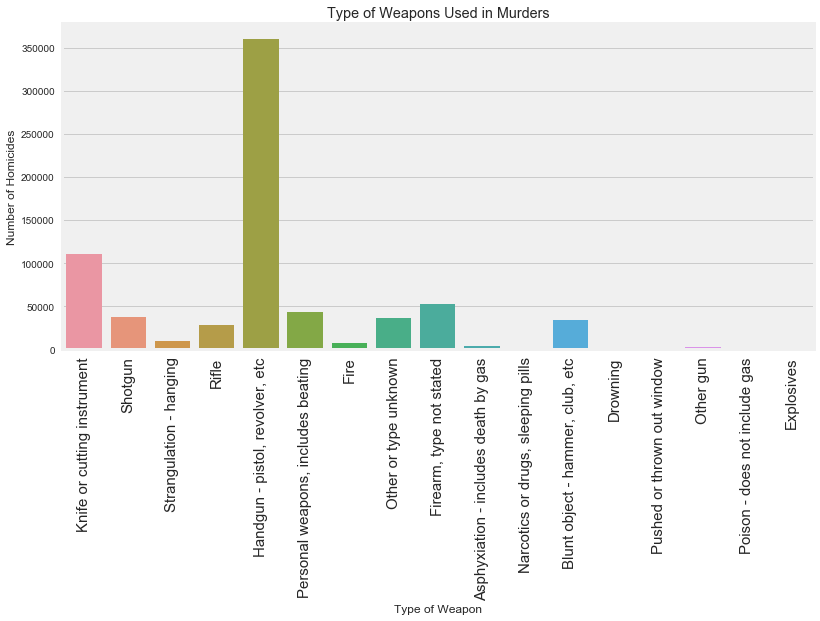

In [77]:
plt.figure(figsize=(12,6))
sns.countplot(x='Weapon', data=shr)
plt.xticks(rotation=90, fontsize=15)
plt.title('Type of Weapons Used in Murders')
plt.xlabel('Type of Weapon')
plt.ylabel('Number of Homicides')
plt.show()

In [78]:
# Single vs. Multiple Victims/Offenders
shr.Situation.value_counts()

Single victim/single offender           403907
Single victim/unknown offender(s)       195309
Single victim/multiple offenders         73298
Multiple victims/single offender         32446
Multiple victims/unknown offender(s)     15680
Multiple victims/multiple offenders       9592
Name: Situation, dtype: int64

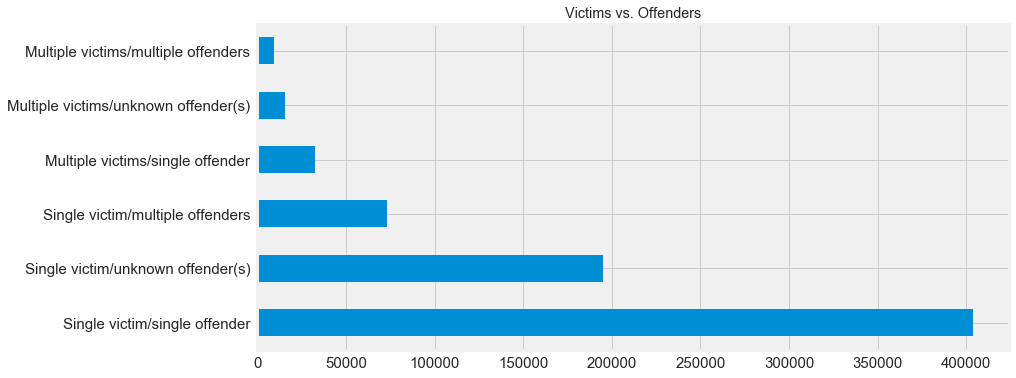

In [79]:
shr.Situation.value_counts().plot("barh",figsize=(12,6), fontsize=15,title="Victims vs. Offenders")

In [80]:
# Circumstances of incidents
shr.Circumstance.value_counts()

Other arguments                         194117
Circumstances undetermined              186930
Other                                    94521
Robbery                                  58027
Narcotic drug laws                       27517
Juvenile gang killings                   23111
Other - not specified                    22253
Brawl due to influence of alcohol        15839
Felon killed by police                   15516
Argument over money or property          14883
All suspected felony type                12947
Felon killed by private citizen          11827
Lovers triangle                          11709
Burglary                                  6184
Brawl due to influence of narcotics       4866
Arson                                     4430
All other manslaughter by negligence      4370
Rape                                      4132
Gangland killings                         3933
Other negligent handling of gun           3457
Other sex offense                         1435
Children play

In [81]:
shr.groupby('Circumstance').Solved.value_counts()

Circumstance                          Solved
Abortion                              Yes           10
All other manslaughter by negligence  Yes         4074
                                      No           296
All suspected felony type             No          9356
                                      Yes         3591
Argument over money or property       Yes        14142
                                      No           741
Arson                                 Yes         2698
                                      No          1732
Brawl due to influence of alcohol     Yes        14921
                                      No           918
Brawl due to influence of narcotics   Yes         3977
                                      No           889
Burglary                              Yes         4305
                                      No          1879
Child killed by babysitter            Yes         1189
                                      No            16
Children playing wit

In [82]:
# Percentage of solved homicides by circumstance of incident
shr.groupby('Circumstance').Solved.value_counts(normalize=True)

Circumstance                          Solved
Abortion                              Yes       1.000000
All other manslaughter by negligence  Yes       0.932265
                                      No        0.067735
All suspected felony type             No        0.722638
                                      Yes       0.277362
Argument over money or property       Yes       0.950212
                                      No        0.049788
Arson                                 Yes       0.609029
                                      No        0.390971
Brawl due to influence of alcohol     Yes       0.942042
                                      No        0.057958
Brawl due to influence of narcotics   Yes       0.817304
                                      No        0.182696
Burglary                              Yes       0.696151
                                      No        0.303849
Child killed by babysitter            Yes       0.986722
                                      No   

In [83]:
# Subcircumstances - special set of circumstances 
shr.Subcircum.unique()

array([nan, 'Felon killed in commission of a crime',
       'Felon attacked a civilian', 'Felon resisted arrest',
       'Felon attempted flight from a crime',
       'Felon attacked fellow police officer',
       'Not enough information to determine',
       'Felon attacked police officer'], dtype=object)

In [84]:
shr.Subcircum.value_counts()

Felon killed in commission of a crime    9974
Felon attacked police officer            8031
Felon attacked a civilian                4176
Not enough information to determine      2276
Felon resisted arrest                    1179
Felon attacked fellow police officer      888
Felon attempted flight from a crime       809
Name: Subcircum, dtype: int64

## Model Building 

I am trying to predict whether a murder would be solved or not. 

In [4]:
# My target variable is whether a murder was solved or not. 
y = [1 if x == 'Yes' else 0 for x in shr.Solved]

In [5]:
# Assign the new variable y to a dataset column called 'target':
shr['target'] = y

In [6]:
# Make sure the numbers are correct:
shr['target'].value_counts()

1    518240
0    213931
Name: target, dtype: int64

In [7]:
shr['Solved'].value_counts()

Yes    518240
No     213931
Name: Solved, dtype: int64

It fits!

In [17]:
# Correlation matrix:
shr.corr()

,Year,Incident,VicCount,OffCount,FileDate,target
Year,1.000000,0.129837,0.029732,0.062830,0.024801,-0.043682
Incident,0.129837,1.000000,-0.008442,-0.005795,-0.102631,-0.022515
VicCount,0.029732,-0.008442,1.000000,0.061206,0.000361,0.021791
OffCount,0.062830,-0.005795,0.061206,1.000000,-0.022983,0.162021
FileDate,0.024801,-0.102631,0.000361,-0.022983,1.000000,-0.010009
target,-0.043682,-0.022515,0.021791,0.162021,-0.010009,1.000000


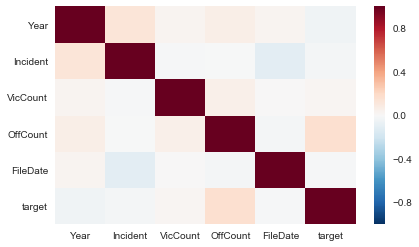

In [18]:
sns.heatmap(shr.corr())

Not a lot of strong correlations... It seems that the strongest correlations are between the victims' age and the offenders' age. I didn't check the categorical variables - it's time for some features engineering.

### Feature Engineering 


In [8]:
# Build categories - intimate relationships, family relationships and work relationship.
def encodeIntimateRelationship(x): return 1 if x in ('Boyfriend', 'Boyfriend/Girlfriend', 'Girlfriend', 'Wife', 'Husband') else 0
def encodeFamilyRelationship(x): return 1 if x in ('Son', 'Family', 'Daughter', 'Brother', 'Father', 'Mother', 'Sister') else 0
def encodeWorkRelationship(x): return 1 if x in ('Employer', 'Employee') else 0

In [9]:
shr['enc_IntimateRelationship'] = shr.Relationship.apply(encodeIntimateRelationship)
shr['enc_FamilyRelationship'] = shr.Relationship.apply(encodeFamilyRelationship)
shr['enc_WorkRelationship'] = shr.Relationship.apply(encodeWorkRelationship)

In [21]:
shr['enc_IntimateRelationship'].value_counts()

0    666399
1     65772
Name: enc_IntimateRelationship, dtype: int64

Not a lot of intimate relationship homicides compared to the entire data - 65,729 out of 730,232.

In [22]:
shr['enc_FamilyRelationship'].value_counts()

0    694244
1     37927
Name: enc_FamilyRelationship, dtype: int64

Same with family relationships - 37,825 out of 730,232.

In [23]:
shr['enc_WorkRelationship'].value_counts()

0    731168
1      1003
Name: enc_WorkRelationship, dtype: int64

Very few work related homicides!

Let's get some more dummy variables:

In [10]:
off_dummies = pd.get_dummies(shr['OffRace'])

In [11]:
vic_dummies = pd.get_dummies(shr['VicRace'])

In [12]:
def encodeGender(x): return 1 if x == 'Female' else 0 

In [13]:
shr['VicSexDummy'] = shr.VicSex.apply(encodeGender)

In [102]:
shr.VicSexDummy.value_counts()

0    565796
1    164436
Name: VicSexDummy, dtype: int64

### Logistic Regression 

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [16]:
lr = LogisticRegression()

In [17]:
# Building the model:
y = LabelEncoder().fit_transform(shr['Solved'])
X = pd.get_dummies(shr[['VicSex','VicRace','OffAge','OffRace', 'enc_IntimateRelationship', 'enc_FamilyRelationship', 'enc_WorkRelationship']])

In [21]:
lr.fit(X, y)

print lr.predict
print lr.coef_

<bound method LogisticRegression.predict of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)>
[[  4.22766744e+00   2.46989363e+00   1.08252633e+00   1.86234325e+00
    2.26772725e+00  -5.22101090e-01   6.40885419e-01   6.41130316e-01
    1.41055980e-01   1.75846151e+00   4.26436180e-01  -2.16016987e+00
    3.83634457e-01  -1.71468150e+00  -1.30161193e+00   2.40513692e-02
    8.87750180e-01  -5.85898291e-01  -6.23706578e-02   7.45288731e-01
    8.17759897e-01   1.14471684e+00   2.24680891e-04   1.11481458e-01
    3.39442781e-01   6.58608489e-01   1.10985305e+00   7.28806257e-01
   -9.04150905e-01   4.34068081e-01   8.96819423e-01   1.57497603e+00
    4.87382857e-01   6.66428543e-04  -2.45724820e-02   6.31734903e-01
    1.01212938e+00   1.28191834e+00   6.46704796e-01   2.734

In [22]:
lr.predict_proba

<bound method LogisticRegression.predict_proba of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)>

### Random Forest

In [15]:
# Necessary imports for statistical analysis:
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [105]:
# Dropping missed values for the statistical analysis:
shr.dropna(inplace=True)

In [30]:
# Building the model:
y = LabelEncoder().fit_transform(shr['Solved'])
X = pd.get_dummies(shr[['VicSex','VicRace','OffAge','OffRace', 'enc_IntimateRelationship', 'enc_FamilyRelationship', 'enc_WorkRelationship']])

In [31]:
# Creating a train-test split:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.33)

In [32]:
# Use cross-validation:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=41)

In [33]:
rt = RandomForestClassifier(n_jobs=-1)
rt.fit(X_train, Y_train)
Y_pred = rt.predict(X_test)
print rt.score(X_test, Y_test)
s = cross_val_score(rt, X_train, Y_train, cv=cv, n_jobs=-1)
print "{} Score:\t{:0.3} ± {:0.3}".format("Random Forest", s.mean().round(3), s.std().round(3))

0.99427192623
Random Forest Score:	0.994 ± 0.0


In [34]:
rt.base_estimator

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [111]:
rt.estimator_params

('criterion',
 'max_depth',
 'min_samples_split',
 'min_samples_leaf',
 'min_weight_fraction_leaf',
 'max_features',
 'max_leaf_nodes',
 'min_impurity_split',
 'random_state')

In [112]:
rt.decision_path

<bound method RandomForestClassifier.decision_path of RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=-1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)>

In [113]:
rt.estimators_

[DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_split=1e-07, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             presort=False, random_state=1482750730, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_split=1e-07, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             presort=False, random_state=1994024122, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_split=1e-07, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             presort=False, random_state=909022356, splitter='best'),
 DecisionTreeClassifier

Next steps is to check other classification methods (such as logistic regression, for example) for predicting whether a case would be solved or not. Stay toned!